In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from yolo_config import Config

In [2]:
all_results_path = os.path.join(Config.RUNS_DIR, Config.DATASET, 'all_results.csv')
all_results = pd.read_csv(all_results_path, index_col=0)
all_results

,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),fitness,TP,FP,FN,TN,TPR,FNR
yolov8n.pt_conf=0.1,0.909892,0.764896,0.837414,0.604750,0.628017,7.4,1.6,2.7,0.0,0.732673,0.267327
yolov8n.pt_conf=0.2,0.925994,0.723654,0.821700,0.601781,0.623773,7.4,1.6,2.7,0.0,0.732673,0.267327
yolov8n.pt_conf=0.3,0.921709,0.695769,0.810015,0.596757,0.618083,7.2,1.5,2.9,0.0,0.712871,0.287129
yolov8n.pt_conf=0.4,0.917988,0.646473,0.788410,0.583325,0.603834,6.6,0.9,3.5,0.0,0.653465,0.346535
yolov8n.pt_conf=0.5,0.925723,0.543718,0.741216,0.560558,0.578624,5.6,0.4,4.5,0.0,0.554455,0.445545
yolov8n.pt_conf=0.6,0.927967,0.480470,0.705863,0.553515,0.568750,4.9,0.3,5.2,0.0,0.485149,0.514851
yolov8n.pt_conf=0.7,0.966667,0.388611,0.674293,0.534413,0.548401,4.0,0.0,6.1,0.0,0.396040,0.603960
yolov8n.pt_conf=0.8,0.800000,0.190235,0.495108,0.402982,0.412195,2.0,0.0,8.1,0.0,0.198020,0.801980
yolov8n.pt_conf=0.9,0.300000,0.031303,0.165649,0.149084,0.150740,0.3,0.0,9.8,0.0,0.029703,0.970297
yolov8s.pt_conf=0.1,0.874789,0.746243,0.812613,0.574789,0.598571,6.8,1.2,3.3,0.0,0.673267,0.326733


In [3]:
thresholds = Config.THRESHOLDS

nano_models = [f'yolov8n.pt_conf={conf}' for conf in thresholds]
nano_results = all_results.loc[nano_models]

small_models = [f'yolov8s.pt_conf={conf}' for conf in thresholds]
small_results = all_results.loc[small_models]

medium_models = [f'yolov8m.pt_conf={conf}' for conf in thresholds]
medium_results = all_results.loc[medium_models]


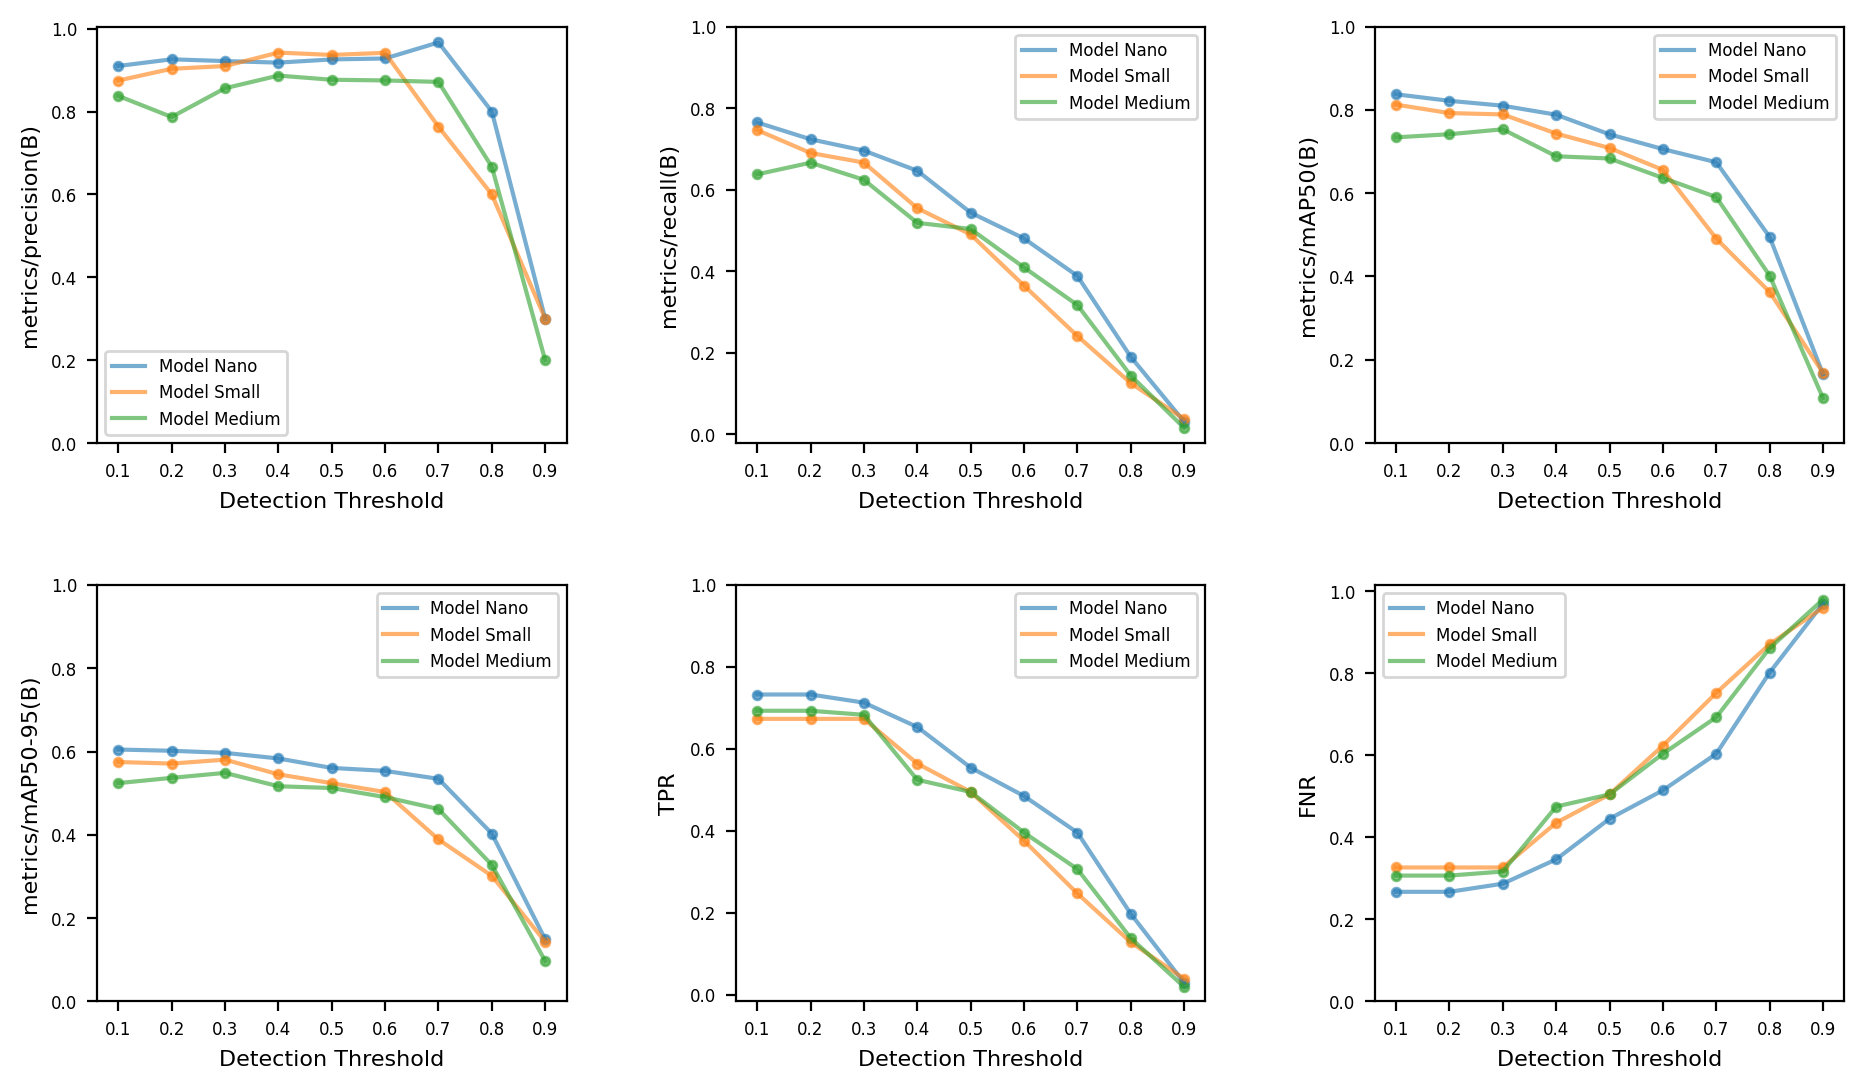

In [4]:

metrics = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 
        'metrics/mAP50-95(B)', 'fitness']


fig, axes = plt.subplots(2, 3, figsize=(10,6), dpi=200)
fig.tight_layout(pad=3)
axes = axes.flat

for i, metric in enumerate(metrics):

    ax = axes[i]

    ax.plot(thresholds, nano_results[metric], alpha=0.6, label='Model Nano')
    ax.scatter(thresholds, nano_results[metric], alpha=0.6, s=10)
    ax.plot(thresholds, small_results[metric], alpha=0.6, label='Model Small')
    ax.scatter(thresholds, small_results[metric], alpha=0.6, s=10)
    ax.plot(thresholds, medium_results[metric], alpha=0.6, label='Model Medium')
    ax.scatter(thresholds, medium_results[metric], alpha=0.6, s=10)

    ax.legend(fontsize=6)

    y_ticks = np.round(np.arange(0,1.1,0.2), 1)
    ax.set_yticks(y_ticks, labels=y_ticks, fontsize=6)
    ax.set_xticks(thresholds, labels=thresholds, fontsize=6)

    ax.set_xlabel("Detection Threshold", fontsize=8)
    ax.set_ylabel(metric, fontsize=8)
